# Fra Kalkulus til billedanalyse

Aasa Feragen -- afhar@dtu.dk

I denne forelæsning skal vi lære om *foldninger*, og hvordan vi kan bruge dem til at gå fra matematiske formler, til praktiske implementationer på en computer, der finder kanter i billeder.

Hvis du har Jupyter Notebook installeret på din computer, kan du arbejde på den. Ellers kan du bruge en google-konto til at tilgå den på 

https://colab.research.google.com

hvor du kan uploade notebooken, arbejde i den og køre din kode.

In [1]:
# Importing packages
from scipy import signal as sg
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
%matplotlib inline
from matplotlib import cm                      # Import colormaps

## Del 1: Hvad er et billede?
Nedenunder bruger vi computeren til at læse et billede ind og kigge på dets mest elementære egenskaber

Downloading...
From: https://drive.google.com/uc?id=1DVCQMiH5ZVyAJwykd9t-ME7AmAnA7K9P
To: /home/afhar/Documents/Teaching/ITCamp2020/dendrite.png
100%|██████████| 437k/437k [00:00<00:00, 2.45MB/s]


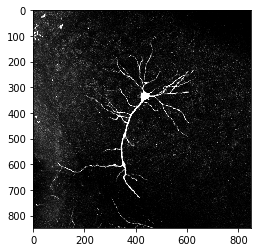

In [21]:
# Læs det billede ind, der hedder "dendrite.png", og print det inline
import gdown

url = 'https://drive.google.com/uc?id=1DVCQMiH5ZVyAJwykd9t-ME7AmAnA7K9P'

gdown.download(url, './dendrite.png', quiet=False)

f = io.imread('dendrite.png')
plt.imshow(f, cmap=cm.Greys_r)

**Spørgsmål:** Hvorfor står der tal langs venstre side og under billedet?

Billedet består af en "kasse" med et BxH gitter, hvor hver pixel i gitteret indeholder et tal, der indkoder billedets intensitet. Intensiteterne tager heltaltsværdier mellem 0 (sort) og 255 (hvid)

In [4]:
print("Billedets brædde og højde:", f.shape)
print("Billedets intensitetsværdier:", np.unique(f))

Billedets brædde og højde: (848, 848)
Billedets intensitetsværdier: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229

**Eksempel:** Vi looper igennem billedet og sætter alle de pixels, der har højere værdi end T=100, til 255. Resten sætter vi til 0.

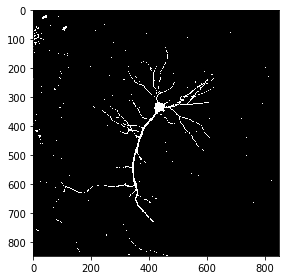

In [5]:
T = 100
B, H = f.shape
for x in range(B):
    for y in range(H):
        if f[x,y] > T:
            f[x,y] = 255
        else:
            f[x,y] = 0
            
io.imshow(f)

In [ ]:
url = 'https://drive.google.com/uc?id=14p2isgDFCqJ-oXlvPr2OjsbqCnCmuLPd'
gdown.download(url, './cameraman.png', quiet=False)

**Opgave 2:** Kan du finde en måde at gøre billedet mørkere på? Lysere? Prøv det gerne!

NB! For at skalere intensiteten korrekt, kan du tilføje vmin og vmax:

io.imshow(f, cmap=cm.Greys_r, vmin=0, vmax=255)

## Del 2: Foldninger og filtrering
Nu har I vennet jer til at arbejde med billeder på en computer, og vi er klare til at lære om "foldninger". I en foldning, bruger man en "kerne" til at køre over og "undersøge" billedet.

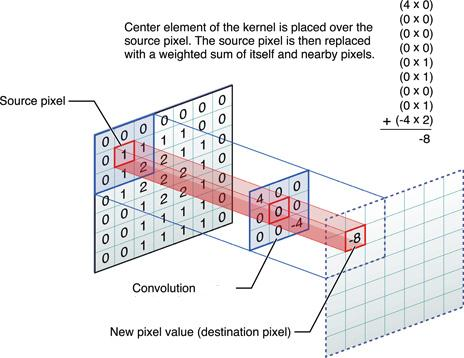

**Example: Et mean-filter**

Vi indlæser billedet "cameraman.png" udglatter det ved hjælp af et "mean-filter".

Downloading...
From: https://drive.google.com/uc?id=14p2isgDFCqJ-oXlvPr2OjsbqCnCmuLPd
To: /home/afhar/Documents/Teaching/ITCamp2020/cameraman.png
100%|██████████| 38.3k/38.3k [00:00<00:00, 1.04MB/s]


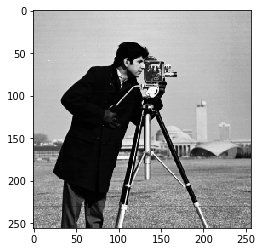

In [22]:
# Læs det billede ind, der hedder "cameraman.png"
url = 'https://drive.google.com/uc?id=14p2isgDFCqJ-oXlvPr2OjsbqCnCmuLPd'
gdown.download(url, './cameraman.png', quiet=False)

f = np.array(io.imread('cameraman.png'))
plt.imshow(f, cmap=cm.Greys_r)

For at se hvad foldning laver, lad os kigge på et 3x3 udsnit af billedet centreret i $x=112$, $y=124$ som værdier

patch = 
 [[ 9  9 10]
 [ 8  8  8]
 [ 9  9  9]]


/home/afhar/anaconda3/envs/AasaTorch/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


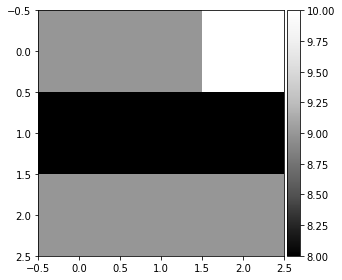

In [8]:
patch = f[111:114, 123:126]
io.imshow(patch, interpolation='none', cmap=cm.Greys_r)
print("patch = \n", patch)

Lav en mean-filter-kerne $g$ og brug den til at lave 3x3 mean-filtering af billedet

g: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


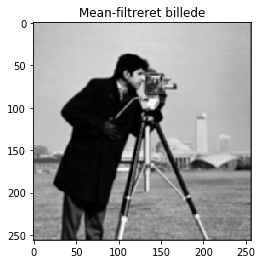

In [15]:
# Lav kernen
g = np.ones((3,3))
g /= g.sum()
print('g:', g)

# Lav foldning af f og g
fg = sg.convolve2d(f, g, mode='same')
plt.imshow(fg, cmap=cm.Greys_r)
plt.title('Mean-filtreret billede')
plt.show()

Lad os kigge på vores udsnit for at se hvad foldningen gjorde:

forventet værdi ved midtpunkt-pixel (112,124):  8.777777777777779
patch efter foldning:
patchf = 
 [[ 8.55555556  8.77777778  9.33333333]
 [ 8.44444444  8.77777778  9.55555556]
 [ 8.55555556  8.66666667 11.11111111]]


/home/afhar/anaconda3/envs/AasaTorch/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


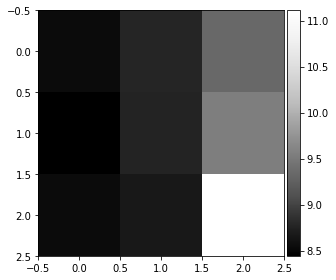

In [16]:
patchf = fg[111:114, 123:126]
io.imshow(patchf, interpolation='none', cmap=cm.Greys_r)
# check box convolution as local averaging
print("forventet værdi ved midtpunkt-pixel (112,124): ", (g*patch).sum())
print("patch efter foldning:")
print("patchf = \n", patchf)

**Eksempel:** Gør det samme med et billede, der har tilføjet støj.

Text(0.5,1,'Efter mean-filtrering')

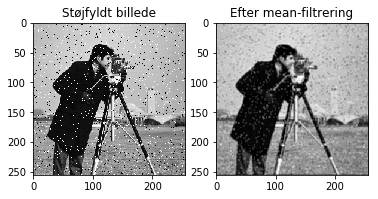

In [11]:
# Tilføj støj
f_n = skimage.util.random_noise(f, mode='s&p')

# Brug mean-filter
f_nc = sg.convolve2d(f_n, g, mode='same')

fig, ax = plt.subplots(1,2)
ax[0].imshow(f_n, cmap=cm.Greys_r)
ax[0].set_title('Støjfyldt billede')
ax[1].imshow(f_nc, cmap=cm.Greys_r)
ax[1].set_title('Efter mean-filtrering')

**Opgave 3:** Kan du lave en kerne $g$, som flytter motivet i billedet mod højre?

# Del 3: Fra Kalkulus til kantdetektering

Den afledte af en funktion $f(x)$ er defineret ved
$$
f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h)-f(x_0)}{h}
$$

Forestil dig at du gerne ville tage den afledte i x-retningen af et billede. Hvordan kunne man gøre det? Hvad med y-retningen? Diskuter med din sidemakker!

Vi har ikke mulighed, i billeder, for at tage grænsen $h \to 0$. Den mindste forskel $h$ vi kan kigge på, er $h=1$ pixel. Det kan vi gøre ved hjælp af en kerne $[-1, 1]$ i x-retningen.

Dx: [[-1.  1.]]
Dy: [[ 1.]
 [-1.]]


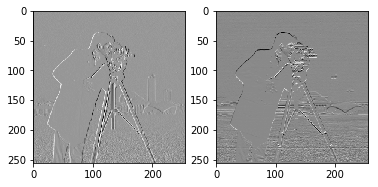

In [12]:
#Lav kernen:
Dx = np.zeros((1,2))
Dx[0,0] = -1
Dx[0,1] = 1
print('Dx:', Dx)

Dy = np.zeros((2,1))
Dy[0,0] = 1
Dy[1,0] = -1
print('Dy:', Dy)

# Udfør foldningen:
Dxf = sg.convolve2d(f, Dx, mode='same')
Dyf = sg.convolve2d(f, Dy, mode='same')

# Visualiser det, der kommer ud:
fig, ax = plt.subplots(1,2)
ax[0].imshow(Dxf, cmap=cm.Greys_r)
ax[1].imshow(Dyf, cmap=cm.Greys_r)
plt.show()


**Opgave 4:** *Gradienten* af billedet er defineret som
$$
\nabla f = (Dx, Dy)
$$
og er en vektor, som peger i den rætning, hvor "billed-landskabet" helder mest opad. Gradientens størrelse er en slags "retnings-fri" billed-afledte. Den er defineret ved
$$
\sqrt{Dx^2 + Dy^2}
$$

Kod en funktion, der beregner gradienten af billedet.